In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.interpolate import griddata

In [2]:
dataset = pd.read_csv('model_input.csv', sep=';')
dataset

,sample,wt,J_norm,S_norm,Vp_anis,Vs1_anis,max_SWS,Vp_axial,Vp_trans,S_micas
0,PBT,0.730,7.14,1.11,20.2,18.7,19.9,16.7,4.9,1.52
1,ANL,0.726,4.08,0.80,23.4,19.7,20.1,22.0,1.9,1.10
2,IRO,0.705,6.36,1.17,24.1,22.8,23.3,22.9,2.2,1.66
3,WA,0.695,1.35,0.23,10.4,8.2,8.9,10.0,0.8,0.34
4,CA,0.679,9.58,1.38,28.7,27.2,27.8,28.2,1.1,2.04
5,RIM,0.644,5.65,0.81,15.0,5.5,12.0,6.4,10.7,1.25
6,OSO,0.631,8.94,1.32,26.5,24.1,24.9,25.9,0.4,2.09
7,EUP,0.599,9.66,1.28,23.5,23.7,24.4,22.9,1.0,2.14
8,GXE,0.588,17.01,1.61,22.9,25.0,26.2,22.1,0.9,2.74
9,RVS,0.485,6.32,1.00,18.2,13.6,14.9,15.7,4.6,2.06


# Calculate linear models

In [3]:
model = sm.OLS.from_formula('Vp_anis ~ S_norm + 0', dataset)

Vp_model = model.fit()
Vp_model.summary()

c:\Users\Marco\miniconda3\envs\stats\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Vp_anis   R-squared (uncentered):                   0.960
Model:                            OLS   Adj. R-squared (uncentered):              0.957
Method:                 Least Squares   F-statistic:                              315.2
Date:                Thu, 29 Feb 2024   Prob (F-statistic):                    1.70e-10
Time:                        16:55:41   Log-Likelihood:                         -39.269
No. Observations:                  14   AIC:                                      80.54
Df Residuals:                      13   BIC:                                      81.18
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
S_norm        19.1253      1.077     17.754      0.000      16.798      21.453
==============================================================================
Omnibus:                        1.804   Durbin-Watson:                   1.517
Prob(Omnibus):                  0.406   Jarque-Bera (JB):                0.395
Skew:                          -0.348   Prob(JB):                        0.821
Kurtosis:                       3.440   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
np.around(100 * (Vp_model.conf_int(1-0.95) - 19.1253) / 19.1253, 1)

,0,1
S_norm,-12.2,12.2


In [8]:
model = sm.OLS.from_formula('Vs1_anis ~ S_norm + 0', dataset)

Vs1_model = model.fit()
Vs1_model.summary()

c:\Users\Marco\miniconda3\envs\stats\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Vs1_anis   R-squared (uncentered):                   0.963
Model:                            OLS   Adj. R-squared (uncentered):              0.960
Method:                 Least Squares   F-statistic:                              338.6
Date:                Thu, 29 Feb 2024   Prob (F-statistic):                    1.08e-10
Time:                        16:55:42   Log-Likelihood:                         -37.481
No. Observations:                  14   AIC:                                      76.96
Df Residuals:                      13   BIC:                                      77.60
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
S_norm        17.4462      0.948     18.402      0.000      15.398      19.494
==============================================================================
Omnibus:                        5.250   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.072   Jarque-Bera (JB):                2.450
Skew:                          -0.947   Prob(JB):                        0.294
Kurtosis:                       3.785   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
np.around(100 * (Vs1_model.conf_int(1-0.95) - 17.4462) / 17.4462, 1)

,0,1
S_norm,-11.7,11.7


In [10]:
model = sm.OLS.from_formula('max_SWS ~ S_norm + 0', dataset)

SWS_model = model.fit()
SWS_model.summary()

c:\Users\Marco\miniconda3\envs\stats\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                max_SWS   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.979
Method:                 Least Squares   F-statistic:                              651.4
Date:                Thu, 29 Feb 2024   Prob (F-statistic):                    1.72e-12
Time:                        16:55:42   Log-Likelihood:                         -33.754
No. Observations:                  14   AIC:                                      69.51
Df Residuals:                      13   BIC:                                      70.15
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
S_norm        18.5407      0.726     25.522      0.000      16.971      20.110
==============================================================================
Omnibus:                        0.041   Durbin-Watson:                   1.401
Prob(Omnibus):                  0.980   Jarque-Bera (JB):                0.258
Skew:                          -0.066   Prob(JB):                        0.879
Kurtosis:                       2.348   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
np.around(100 * (SWS_model.conf_int(1-0.95) - 18.5407) / 18.5407, 1)

,0,1
S_norm,-8.5,8.5


# Make plots

In [12]:
# Set Nature-like plots
import matplotlib as mpl

# Figure size
mpl.rcParams['figure.figsize'] = 6.2, 5.0
# Set x axis
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['xtick.major.size'] = 6
mpl.rcParams['xtick.major.width'] = 1
mpl.rcParams['xtick.minor.size'] = 3
mpl.rcParams['xtick.minor.width'] = 1
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['xtick.top'] = True
# Set y axis
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['ytick.major.size'] = 6
mpl.rcParams['ytick.major.width'] = 1
mpl.rcParams['ytick.minor.size'] = 3
mpl.rcParams['ytick.minor.width'] = 1
mpl.rcParams['ytick.minor.visible'] = True
mpl.rcParams['ytick.right'] = True
# Font sizes
mpl.rcParams['axes.labelsize'] = 21
mpl.rcParams['xtick.labelsize'] = 17
mpl.rcParams['ytick.labelsize'] = 17
mpl.rcParams['legend.fontsize'] = 17
mpl.rcParams['font.size'] = 17
# Font Family
mpl.rcParams['font.family'] = 'Open Sans'
# Set line widths
mpl.rcParams['axes.linewidth'] = 1
mpl.rcParams['grid.linewidth'] = 1
mpl.rcParams['lines.linewidth'] = 2.0
mpl.rcParams['lines.markersize'] = 12
# Remove legend frame
mpl.rcParams['legend.frameon'] = False

Text(1.15, 0, 'y = 18.54x\n$R^2$ = 0.98')

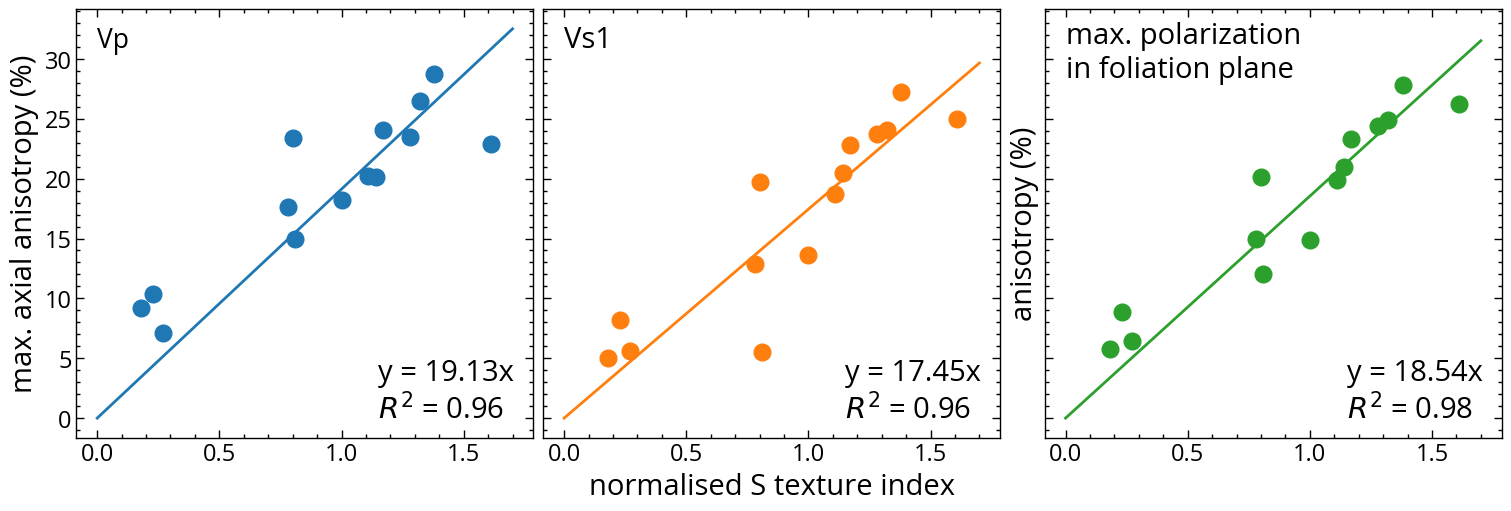

In [13]:
x = np.linspace(0, 1.7)

fig, (ax1, ax2, ax3) = plt.subplots(figsize=(15, 5), ncols=3, sharey=True, constrained_layout=True)

ax1.plot(dataset['S_norm'], dataset['Vp_anis'], 'o', color='C0', label='Vp')
ax1.plot(x, 19.1253*x, linewidth=2, color='C0')
ax1.set_ylabel('max. axial anisotropy (%)')
ax1.text(0, 31, s='Vp', fontsize=19)
ax1.text(1.15, 0, s='y = 19.13x\n$R^2$ = 0.96', fontsize=21)

ax2.plot(dataset['S_norm'], dataset['Vs1_anis'], 'o', color='C1', label='Vs1')
ax2.plot(x, 17.4462*x, linewidth=2, color='C1')
ax2.set_xlabel('normalised S texture index')
ax2.text(0, 31, s='Vs1', fontsize=21)
ax2.text(1.15, 0, s='y = 17.45x\n$R^2$ = 0.96', fontsize=21)

ax3.plot(dataset['S_norm'], dataset['max_SWS'], 'o', color='C2', label='polarization')
ax3.plot(x, 18.5407*x, linewidth=2, color='C2')
ax3.set_ylabel('anisotropy (%)')
ax3.text(0, 28.5, s='max. polarization \nin foliation plane', fontsize=21)
ax3.text(1.15, 0, s='y = 18.54x\n$R^2$ = 0.98', fontsize=21)

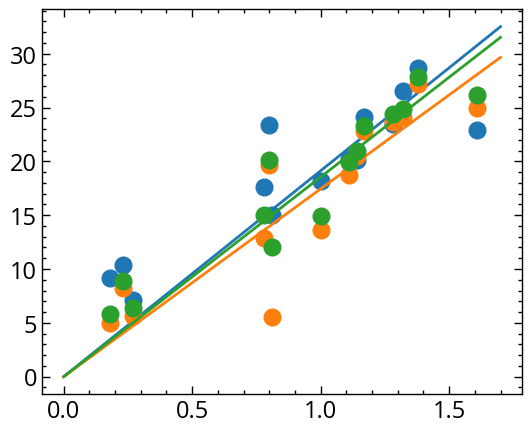

In [14]:
fig, ax = plt.subplots()

ax.plot(dataset['S_norm'], dataset['Vp_anis'], 'o', color='C0', label='Vp anisotropy')
ax.plot(x, 19.1253*x, linewidth=2, color='C0')

ax.plot(dataset['S_norm'], dataset['Vs1_anis'], 'o', color='C1', label='Vs1 anisotropy')
ax.plot(x, 17.4462*x, linewidth=2, color='C1')

ax.plot(dataset['S_norm'], dataset['max_SWS'], 'o', color='C2', label='SWS anisotropy')
ax.plot(x, 18.5407*x, linewidth=2, color='C2')